<a href="https://colab.research.google.com/github/areeba-droid/ComputerVisionFonts/blob/yuki/ComputerVisionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1> <b> Font Classification Using YOLO <b> </h1></center>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing required Libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
import seaborn as sns
import glob
import xml.etree.ElementTree as ET
from PIL import Image
import os
import shutil

# Dataset Description






# Data Preprocessing

For preprocessing:
- We have to convert the dataset into that acceptable by YOLO.
  - Heirarchy of folders should be the one accepted by YOLO
- Check and see if there are any missing labels or images. And remove them from dataset.


## Heirarchy of Folders correction

Defining paths to train and test folders.

In [41]:
data_dir = '/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images'

In [4]:
test_dir = '/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/val'
train_dir = '/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/train'

In [47]:
#set the paths to labels and images directory
label_dir= "/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/labels"
image_dir="/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images"

In [43]:
#get list of all class names and put into an array
classList = os.listdir(test_dir)

classList

['Aladin-Regular',
 'BowlbyOneSC-Regular',
 'Bonbon-Regular',
 'AmaticSC-Regular',
 'AmericanTypewriter-Condensed',
 'CarterOne',
 'BrushScriptMT',
 'BradleyHandITCTT-Bold',
 'AlexBrush-Regular',
 'Allura-Regular',
 'Didot',
 'Chalkduster',
 'CourierNewPSMT',
 'Damion',
 'DancingScript-Bold',
 'GochiHand-Regular',
 'Copperplate',
 'Cookie-Regular',
 'FredokaOne-Regular',
 'Futura-CondensedMedium',
 'HelveticaNeue',
 'GreatVibes-Regular',
 'Noteworthy-Light',
 'Optima-Regular',
 'GrandHotel-Regular',
 'Luminari-Regular',
 'Impact',
 'Helvetica-Bold',
 'Pacifico-Regular',
 'MarkerFelt-Thin',
 'Shojumaru-Regular',
 'RockSalt',
 'Rockwell-Regular',
 'Yesteryear-Regular',
 'TimesNewRomanPSMT',
 'SwankyandMooMoo',
 'Gopher']

Making directories according to above struture of folders

In [ ]:
#import os
#run it once for making directories

#os.makedirs('/content/drive/MyDrive/Tutorials/Datasets/FRUIT DATA/Final_data')
# os.makedirs('/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images')
os.makedirs('/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/train')
# os.makedirs('/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/val')

In [45]:
#create folders inside train/test/val to label data
for item in classList:
  os.makedirs('/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/labels/train/' + item)
  os.makedirs('/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/labels/val/' + item)
  # print('/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/labels/train/' + item)

In [ ]:
import os, glob

def load_data():
    X,y=[],[]
    count = 0
    for file in glob.glob("/content/drive/MyDrive/IAT 360/Computer Vision Project/font_data/*/*"):
        file_name=os.path.basename(file)
        font_name=os.path.basename(os.path.dirname(file))
        font_image = (file)
        X.append(font_image)
        y.append(font_name)
        count += 1
        # '\r' + end='' results in printing over same line
        print('\r' + f' Processed {count}/{11682} samples',end=' ')
        # print(font_image)
    # Return arrays to plug into sklearn's cross-validation algorithms
    return np.array(X), np.array(y)

In [ ]:
font_image, font_name = load_data()

In [ ]:
font_image

In [ ]:
font_name

In [ ]:
from sklearn.model_selection import train_test_split

#splitting our data
############# Unscaled test/train set #############
X_train80, X_test, y_train80, y_test = train_test_split(
    font_image,
    font_name,
    test_size=0.2,
    random_state=42
)

In [ ]:
X_train80

In [ ]:
X_test

In [ ]:
y_train80

In [ ]:
y_test

Copy XML files and jpg files from the train folder to the folders created.

In [ ]:
#import shutil
#run it once for copying!
for file in X_train80:
    #going through the training data and forming the directory
    if file.endswith(".png"):
        #'file' is the whole directory
        image = Image.open(file)
        image = image.convert("RGB")
        #just gets the name of the png file
        new_filename = os.path.basename(file)
        #gets the class name of the file
        className = new_filename.split("$$")[0]
        image.save(os.path.join(image_dir,"train", className, new_filename), "PNG")


#Copy png files from the test folder to the folders created.
for file in X_test:
    #going through the training data and forming the directory
    if file.endswith(".png"):
        #'file' is the whole directory
        image = Image.open(file)
        image = image.convert("RGB")
        #just gets the name of the png file
        new_filename = os.path.basename(file)
        #gets the class name of the file
        className = new_filename.split("$$")[0]
        image.save(os.path.join(image_dir,"val", className, new_filename), "PNG")
        # print(os.path.join(image_dir,"val", className, new_filename))


Visualizing somme pictures from the dataset

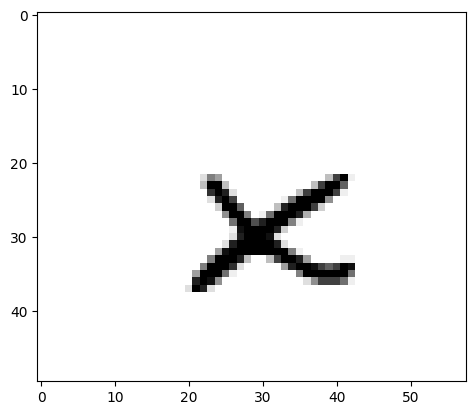

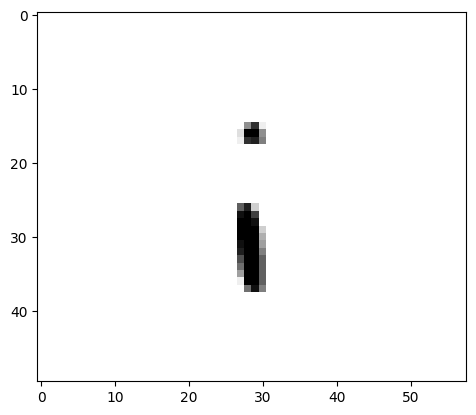

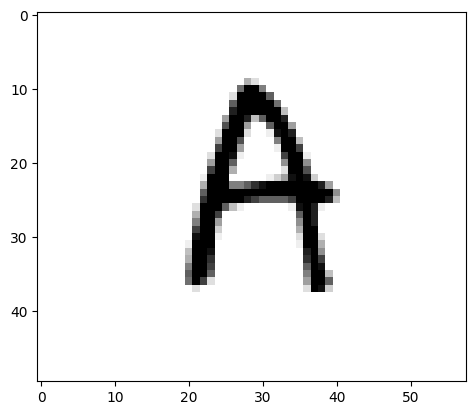

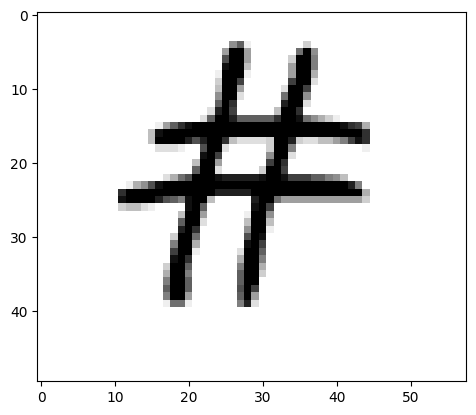

In [ ]:
#visualize first four sample images from train data
for idx, image in enumerate(os.listdir(os.path.join(image_dir, "train", "SwankyandMooMoo"))):
    img = cv2.imread(os.path.join(image_dir,"train", "SwankyandMooMoo", image), 1)
    plt.imshow(img)
    plt.show()

    if idx == 3:
        break

In [63]:
#creating dataframe

training_data = []

#loop through all the font folders
for font in os.listdir(train_dir):
  folder = os.path.join(train_dir, font)
  for image in os.listdir(folder):
    training_data.append({'filename':image, 'label':font})

  # print(font + "completed")

#create the dataframe from the data
df = pd.DataFrame(training_data)

df

,filename,label
0,Aladin-Regular$$U0048U004fU0055.00000.png,Aladin-Regular
1,Aladin-Regular$$U0041U006cU0065.00000.png,Aladin-Regular
2,Aladin-Regular$$U0025.00000.png,Aladin-Regular
3,Aladin-Regular$$U0036.00000.png,Aladin-Regular
4,Aladin-Regular$$U0045U0054U0045.00000.png,Aladin-Regular
...,...,...
9389,Gopher$$35.png,Gopher
9390,Gopher$$3.png,Gopher
9391,Gopher$$8.png,Gopher
9392,Gopher$$31.png,Gopher


In [64]:
#creating dataframe

val_data = []

#loop through all the font folders
for font in os.listdir(test_dir):
  folder = os.path.join(test_dir, font)
  for image in os.listdir(folder):
    val_data.append({'filename':image, 'label':font})

  # print(font + " completed")

#create the dataframe from the data
df2 = pd.DataFrame(val_data)

df2

,filename,label
0,Aladin-Regular$$U003f.00000.png,Aladin-Regular
1,Aladin-Regular$$U0044.00000.png,Aladin-Regular
2,Aladin-Regular$$U0046U0049U0043.00000.png,Aladin-Regular
3,Aladin-Regular$$U00c3U00a8.00000.png,Aladin-Regular
4,Aladin-Regular$$U0042U0041U0044.00000.png,Aladin-Regular
...,...,...
2345,Gopher$$1.png,Gopher
2346,Gopher$$6.png,Gopher
2347,Gopher$$24.png,Gopher
2348,Gopher$$42.png,Gopher


In [65]:
#checking the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9394 entries, 0 to 9393
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  9394 non-null   object
 1   label     9394 non-null   object
dtypes: object(2)
memory usage: 146.9+ KB


In [66]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  2350 non-null   object
 1   label     2350 non-null   object
dtypes: object(2)
memory usage: 36.8+ KB


In [56]:
print(df['label'].unique())
print(df2['label'].unique())

['Aladin-Regular' 'BowlbyOneSC-Regular' 'Bonbon-Regular' 'AmaticSC-Regular' 'AmericanTypewriter-Condensed' 'CarterOne' 'BrushScriptMT' 'BradleyHandITCTT-Bold' 'AlexBrush-Regular' 'Allura-Regular' 'Didot' 'Chalkduster' 'CourierNewPSMT' 'Damion' 'DancingScript-Bold' 'GochiHand-Regular' 'Copperplate' 'Cookie-Regular'
 'FredokaOne-Regular' 'Futura-CondensedMedium' 'HelveticaNeue' 'GreatVibes-Regular' 'Noteworthy-Light' 'Optima-Regular' 'GrandHotel-Regular' 'Luminari-Regular' 'Impact' 'Helvetica-Bold' 'Pacifico-Regular' 'MarkerFelt-Thin' 'Shojumaru-Regular' 'RockSalt' 'Rockwell-Regular' 'Yesteryear-Regular' 'TimesNewRomanPSMT'
 'SwankyandMooMoo' 'Gopher']
['Aladin-Regular' 'BowlbyOneSC-Regular' 'Bonbon-Regular' 'AmaticSC-Regular' 'AmericanTypewriter-Condensed' 'CarterOne' 'BrushScriptMT' 'BradleyHandITCTT-Bold' 'AlexBrush-Regular' 'Allura-Regular' 'Didot' 'Chalkduster' 'CourierNewPSMT' 'Damion' 'DancingScript-Bold' 'GochiHand-Regular' 'Copperplate' 'Cookie-Regular'
 'FredokaOne-Regular' 'Fu

In [68]:
label_map = {'Aladin-Regular' : 0,
 'AlexBrush-Regular' : 1,
   'Allura-Regular' : 2,
   'AmaticSC-Regular' : 3,
   'AmericanTypewriter-Condensed': 4,
   'Bonbon-Regular' : 5,
   'BowlbyOneSC-Regular' : 6,
   'BradleyHandITCTT-Bold' : 7,
   'BrushScriptMT' : 8,
   'CarterOne' : 9,
   'Chalkduster' : 10,
   'Cookie-Regular' : 11,
   'Copperplate' : 12,
   'CourierNewPSMT' : 13,
   'Damion' : 14,
   'DancingScript-Bold' : 15,
   'Didot' : 16,
   'FredokaOne-Regular' : 17,
   'Futura-CondensedMedium' : 18,
   'GochiHand-Regular' : 19,
   'GrandHotel-Regular' : 20,
   'GreatVibes-Regular' : 21,
   'Helvetica-Bold' : 22,
   'HelveticaNeue' : 23,
   'Impact' : 24,
   'Luminari-Regular' : 25,
   'MarkerFelt-Thin' : 26,
   'Noteworthy-Light' : 27,
   'Optima-Regular' : 28,
   'Pacifico-Regular' : 29,
   'RockSalt' : 30,
   'Rockwell-Regular' : 31,
   'Shojumaru-Regular' : 32,
   'SwankyandMooMoo' : 33,
   'TimesNewRomanPSMT' : 34,
   'Yesteryear-Regular' : 35,
   'Gopher' : 36}

df['class'] = df['label'].map(label_map)
df2['class'] = df2['label'].map(label_map)

In [71]:
df2

,filename,label,class
0,Aladin-Regular$$U003f.00000.png,Aladin-Regular,0
1,Aladin-Regular$$U0044.00000.png,Aladin-Regular,0
2,Aladin-Regular$$U0046U0049U0043.00000.png,Aladin-Regular,0
3,Aladin-Regular$$U00c3U00a8.00000.png,Aladin-Regular,0
4,Aladin-Regular$$U0042U0041U0044.00000.png,Aladin-Regular,0
...,...,...,...
2345,Gopher$$1.png,Gopher,36
2346,Gopher$$6.png,Gopher,36
2347,Gopher$$24.png,Gopher,36
2348,Gopher$$42.png,Gopher,36


In [70]:
df

,filename,label,class
0,Aladin-Regular$$U0048U004fU0055.00000.png,Aladin-Regular,0
1,Aladin-Regular$$U0041U006cU0065.00000.png,Aladin-Regular,0
2,Aladin-Regular$$U0025.00000.png,Aladin-Regular,0
3,Aladin-Regular$$U0036.00000.png,Aladin-Regular,0
4,Aladin-Regular$$U0045U0054U0045.00000.png,Aladin-Regular,0
...,...,...,...
9389,Gopher$$35.png,Gopher,36
9390,Gopher$$3.png,Gopher,36
9391,Gopher$$8.png,Gopher,36
9392,Gopher$$31.png,Gopher,36


In [72]:
train_df = df.astype(str)
val_df = df2.astype(str)

In [74]:
#file_name = [x.split('.')[0] for x in df1["name"]]

#TRAINING DATA
#finding all the unique names:
unique_names= train_df['filename'].unique()

#for each unique name, containing multiple bboxes, combine them together.
for name in unique_names:
  data = train_df[train_df.filename == name]
  box_list = []
  for idx in range(len(data)):
        row = data.iloc[idx]
        box_list.append(row['class'])

#writing on text files
  folder = name.split("$$")[0]
  text = "\n".join(box_list)
  with open(f'{label_dir}/train/{folder}/{name}.txt', 'w') as file:
            file.write(text)
#############################################################################################
#VALIDATION DATA
#finding all the unique names:
unique_names= val_df['filename'].unique()

#for each unique name, containing multiple bboxes, combine them together.
for name in unique_names:
  data = val_df[val_df.filename == name]
  box_list = []
  for idx in range(len(data)):
        row = data.iloc[idx]
        box_list.append(row['class'])

#writing on text files
  folder = name.split("$$")[0]
  text = "\n".join(box_list)
  with open(f'{label_dir}/val/{folder}/{name}.txt', 'w') as file:
            file.write(text)

/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/labels/train/Aladin-Regular/Aladin-Regular$$U0048U004fU0055.00000.png.txt w
/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/labels/train/Aladin-Regular/Aladin-Regular$$U0041U006cU0065.00000.png.txt w
/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/labels/train/Aladin-Regular/Aladin-Regular$$U0025.00000.png.txt w
/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/labels/train/Aladin-Regular/Aladin-Regular$$U0036.00000.png.txt w
/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/labels/train/Aladin-Regular/Aladin-Regular$$U0045U0054U0045.00000.png.txt w
/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/labels/train/Aladin-Regular/Aladin-Regular$$U0043U0061U0072.00000.png.txt w
/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/labels/train/Aladin-Regular/Aladin-Regular$$U0045U0041U004e.00000.png.txt w
/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/labels/train/Aladin-Regular/Alad

KeyboardInterrupt: 

In [25]:
#training
print("before deleting (train data): " , df.shape)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
print("after deleting(train_data): " ,df.shape)

#validation
print("before deleting (val data): " , df2.shape)
df2.replace([np.inf, -np.inf], np.nan, inplace=True)
df2.dropna(inplace=True)
print("after deleting(val data): " , df2.shape)

print("nothing to remove")

before deleting (train data):  (9394, 3)
after deleting(train_data):  (9394, 3)
before deleting (val data):  (2350, 3)
after deleting(val data):  (2350, 3)
nothing to remove


# Custom object classification using YOLO

First install and import

In [27]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.4/107.7 GB disk)


In [29]:
from ultralytics import YOLO

## Training YOLO

In [36]:
# model = YOLO('yolov8n-cls.pt') # pretrained model

model = YOLO('yolov8s.pt')

100%|██████████| 21.5M/21.5M [00:00<00:00, 368MB/s]


The detailed architecture of the model can be seen from:


In [31]:
model

YOLO(
  (model): ClassificationModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_

In [32]:
%%writefile config.yaml
path: /content/drive/MyDrive/IAT 360/ComputerVision/Final_data
train: /content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/train
#test: (test dataset folder path)
val: /content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/val

# Classes
nc: 37 # replace based on your dataset's number of classes

# Class names
# replace all class names with your own classes' names
names:
  0: Aladin-Regular
  1: AlexBrush-Regular
  2: Allura-Regular
  3: AmaticSC-Regular
  4: AmericanTypewriter-Condensed
  5: Bonbon-Regular
  6: BowlbyOneSC-Regular
  7: BradleyHandITCTT-Bold
  8: BrushScriptMT
  9: CarterOne
  10: Chalkduster
  11: Cookie-Regular
  12: Copperplate
  13: CourierNewPSMT
  14: Damion
  15: DancingScript-Bold
  16: Didot
  17: FredokaOne-Regular
  18: Futura-CondensedMedium
  19: GochiHand-Regular
  20: GrandHotel-Regular
  21: GreatVibes-Regular
  22: Helvetica-Bold
  23: HelveticaNeue
  24: Impact
  25: Luminari-Regular
  26: MarkerFelt-Thin
  27: Noteworthy-Light
  28: Optima-Regular
  29: Pacifico-Regular
  30: RockSalt
  31: Rockwell-Regular
  32: Shojumaru-Regular
  33: SwankyandMooMoo
  34: TimesNewRomanPSMT
  35: Yesteryear-Regular
  36: Gopher

Writing config.yaml


Please look at [Yolo train Docs](https://docs.ultralytics.com/modes/train/#train-settings) for hyperparameters for model tuning and configuration, e.g. lr0, imgsz, model etc.

In [37]:
# model.train(data=data_dir, epochs=3)

model.train(data="/content/config.yaml", epochs=3)

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/config.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, lin

100%|██████████| 755k/755k [00:00<00:00, 73.7MB/s]

Overriding model.yaml nc=80 with nc=37

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

 15                  -1  1    148224  ultralytics.nn.modules.block.C2f             [384, 128, 1]                 
 16                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
 17            [-1, 12]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 18                  -1  1    493056  ultralytics.nn.modules.block.C2f             [384, 256, 1]                 
 19                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
 20             [-1, 9]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 21                  -1  1   1969152  ultralytics.nn.modules.block.C2f             [768, 512, 1]                 
 22        [15, 18, 21]  1   2130367  ultralytics.nn.modules.head.Detect           [37, [128, 256, 512]]         
Model summary: 225 layers, 11,149,919 parameters, 11,149,903 gradients, 28.7 GFLOPs

Tra

train: Scanning /content/drive/MyDrive/IAT 360/ComputerVision/Final_data/labels/train/Aladin-Regular... 0 images, 9441 backgrounds, 0 corrupt: 100%|██████████| 9441/9441 [35:14<00:00,  4.47it/s]

train: WARNING ⚠️ No labels found in /content/drive/MyDrive/IAT 360/ComputerVision/Final_data/labels/train/Aladin-Regular.cache. See https://docs.ultralytics.com/datasets for dataset formatting guidance.


train: WARNING ⚠️ Cache directory /content/drive/MyDrive/IAT 360/ComputerVision/Final_data/labels/train is not writeable, cache not saved.
WARNING ⚠️ No labels found in /content/drive/MyDrive/IAT 360/ComputerVision/Final_data/labels/train/Aladin-Regular.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/IAT 360/ComputerVision/Final_data/labels/val/Aladin-Regular... 0 images, 436 backgrounds, 0 corrupt:  18%|█▊        | 436/2361 [01:39<07:21,  4.36it/s]


KeyboardInterrupt: 

## Evaluation Metrics

[This](https://docs.ultralytics.com/guides/yolo-performance-metrics/) is a very good detailed explanation of different perfromance metrics in YOLO.

**Choosing the Right Metrics**

Choosing the right metrics to evaluate often depends on the specific application.

- mAP: Suitable for a broad assessment of model performance.

- IoU: Essential when precise object location is crucial.

- Precision: Important when minimizing false detections is a priority.

- Recall: Vital when it's important to detect every instance of an object.

- F1 Score: Useful when a balance between precision and recall is needed.


In [ ]:
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category
metrics.box.mp    # P
metrics.box.mr    # R

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 73 layers, 1,482,277 parameters, 0 gradients, 3.3 GFLOPs
train: /content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/train... found 9441 images in 38 classes: ERROR ❌️ requires 37 classes, not 38
val: /content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/val... found 2361 images in 38 classes: ERROR ❌️ requires 37 classes, not 38
test: None...


val: Scanning /content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/val... 2361 images, 0 corrupt: 100%|██████████| 2361/2361 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 148/148 [00:57<00:00,  2.55it/s]


                   all      0.938      0.991
Speed: 0.0ms preprocess, 13.9ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train52


AttributeError: 'ClassifyMetrics' object has no attribute 'box'. See valid attributes below.

    Class for computing classification metrics including top-1 and top-5 accuracy.

    Attributes:
        top1 (float): The top-1 accuracy.
        top5 (float): The top-5 accuracy.
        speed (Dict[str, float]): A dictionary containing the time taken for each step in the pipeline.
        fitness (float): The fitness of the model, which is equal to top-5 accuracy.
        results_dict (Dict[str, Union[float, str]]): A dictionary containing the classification metrics and fitness.
        keys (List[str]): A list of keys for the results_dict.

    Methods:
        process(targets, pred): Processes the targets and predictions to compute classification metrics.
    

Showing confusion matrix, that is already stored in detect/train folder

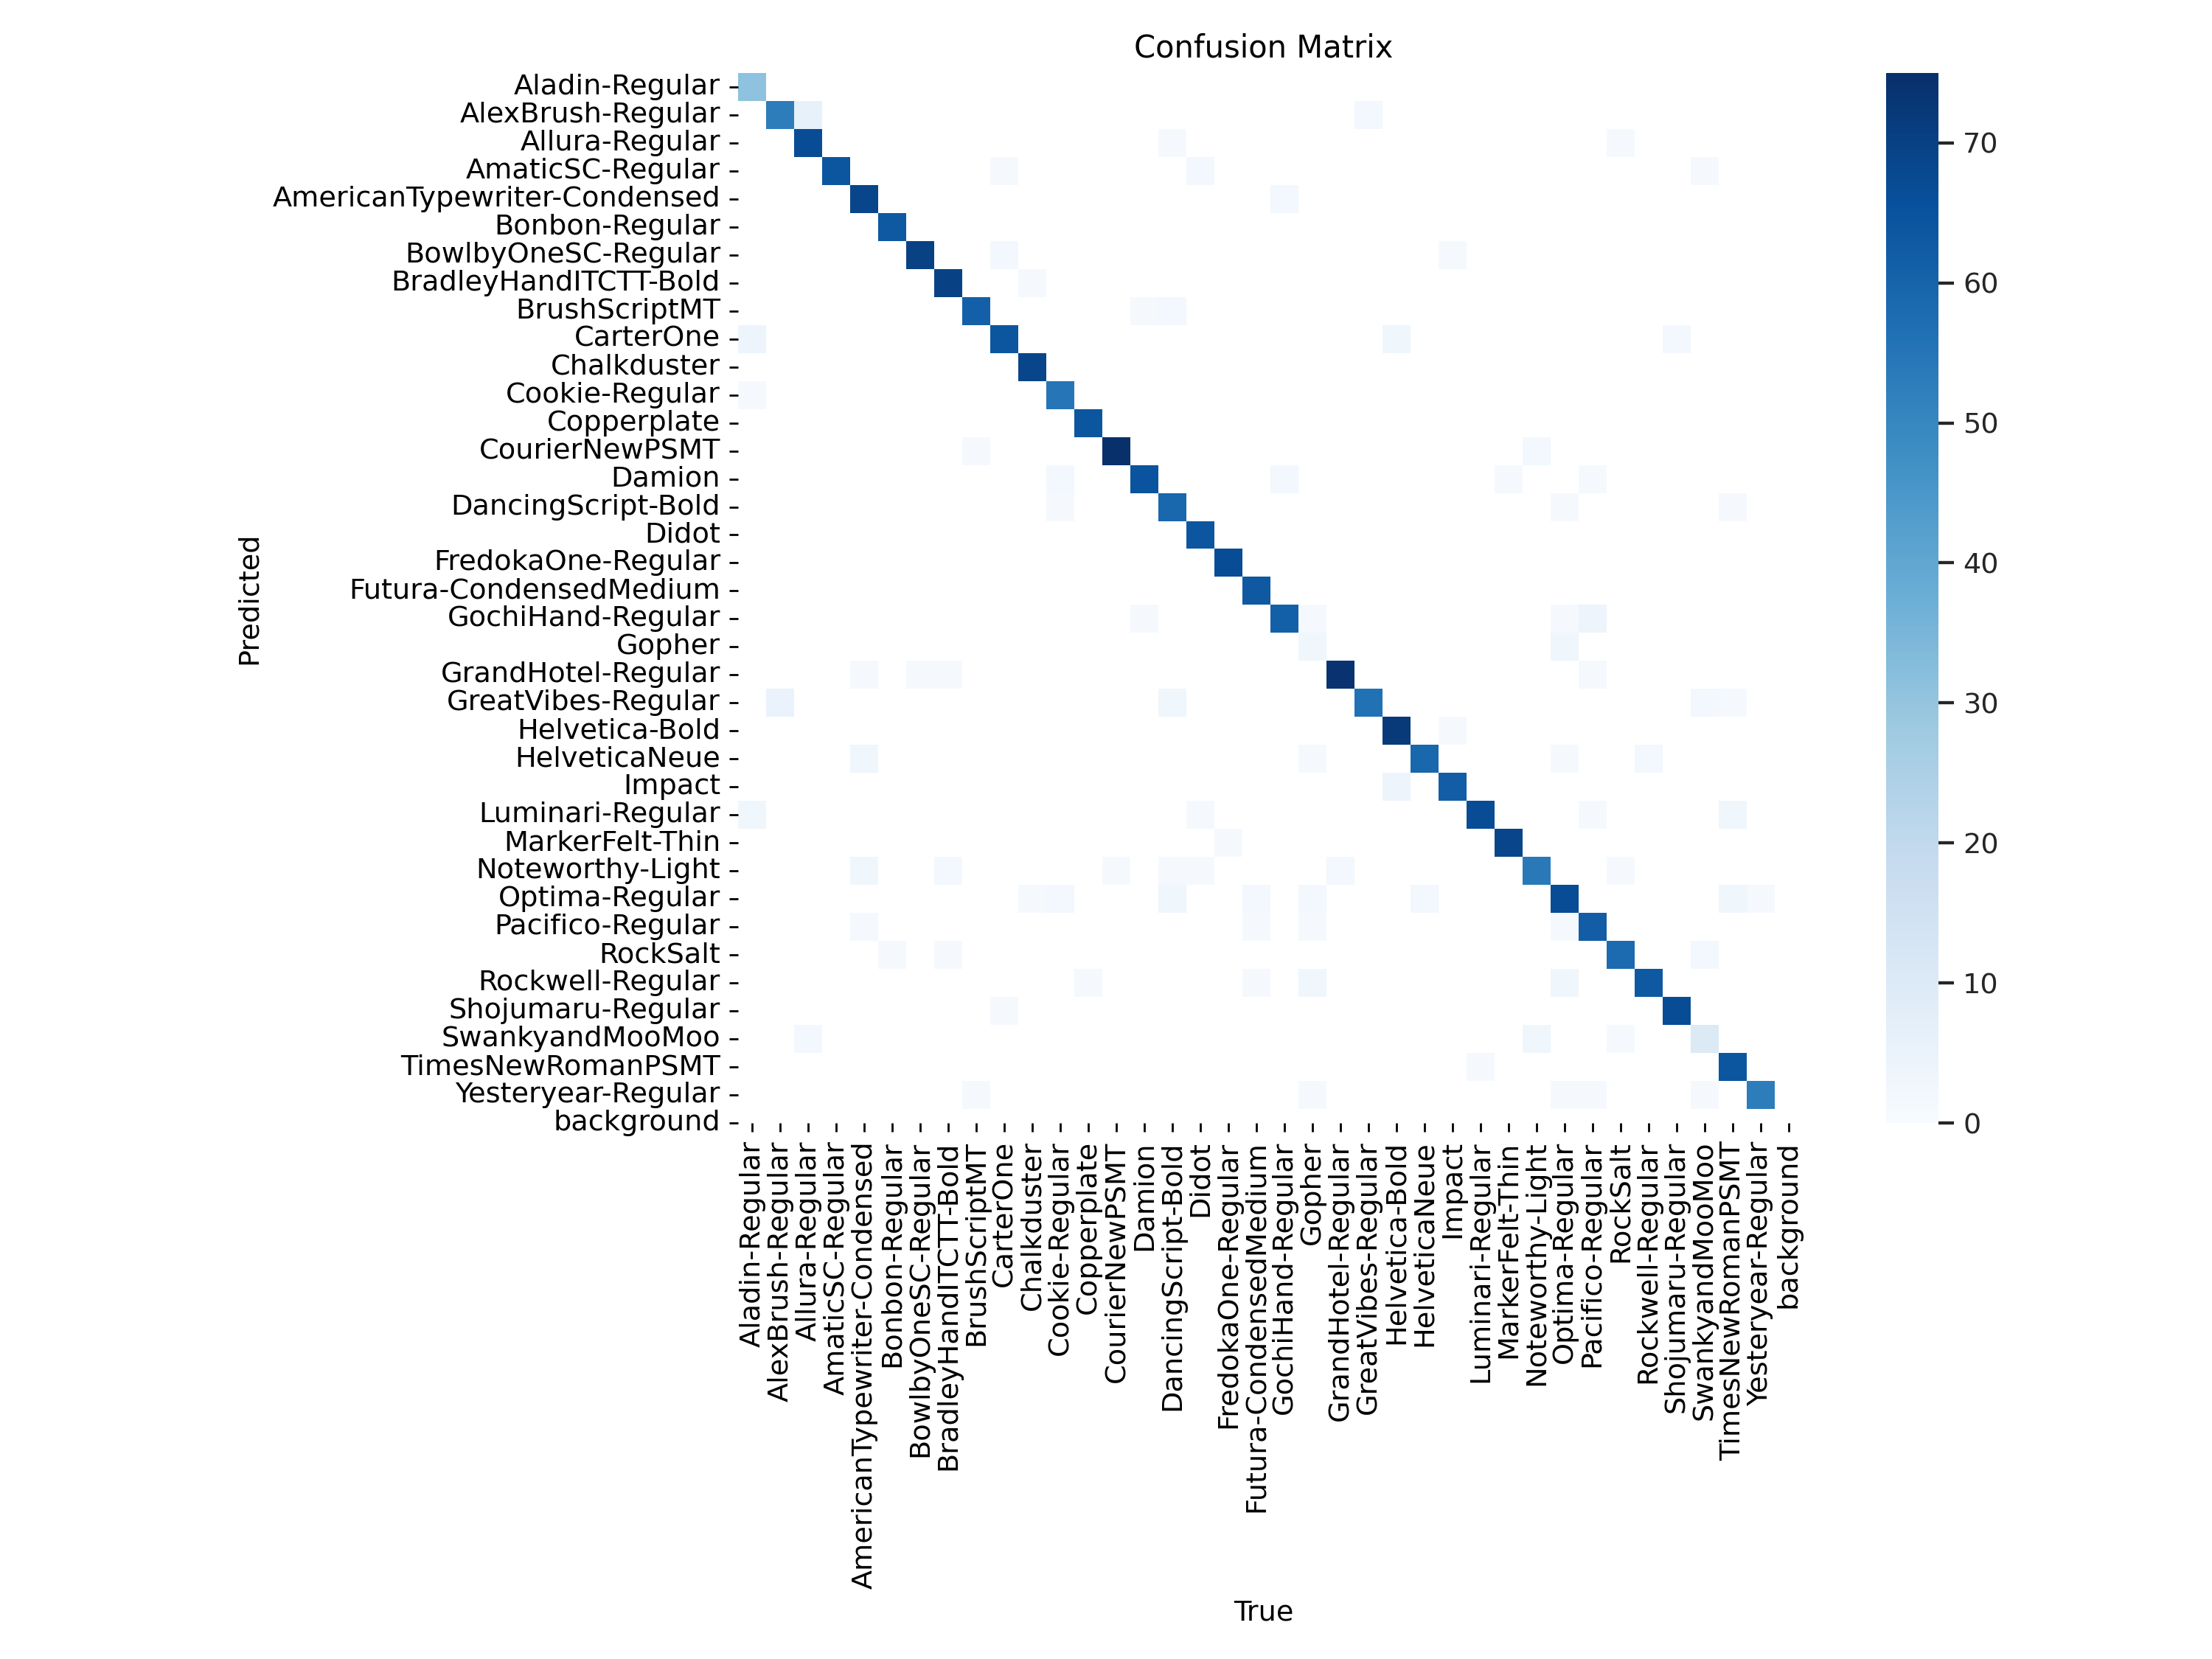

In [ ]:
%matplotlib inline
from PIL import Image

Image.open('/content/runs/classify/train5/confusion_matrix.png')

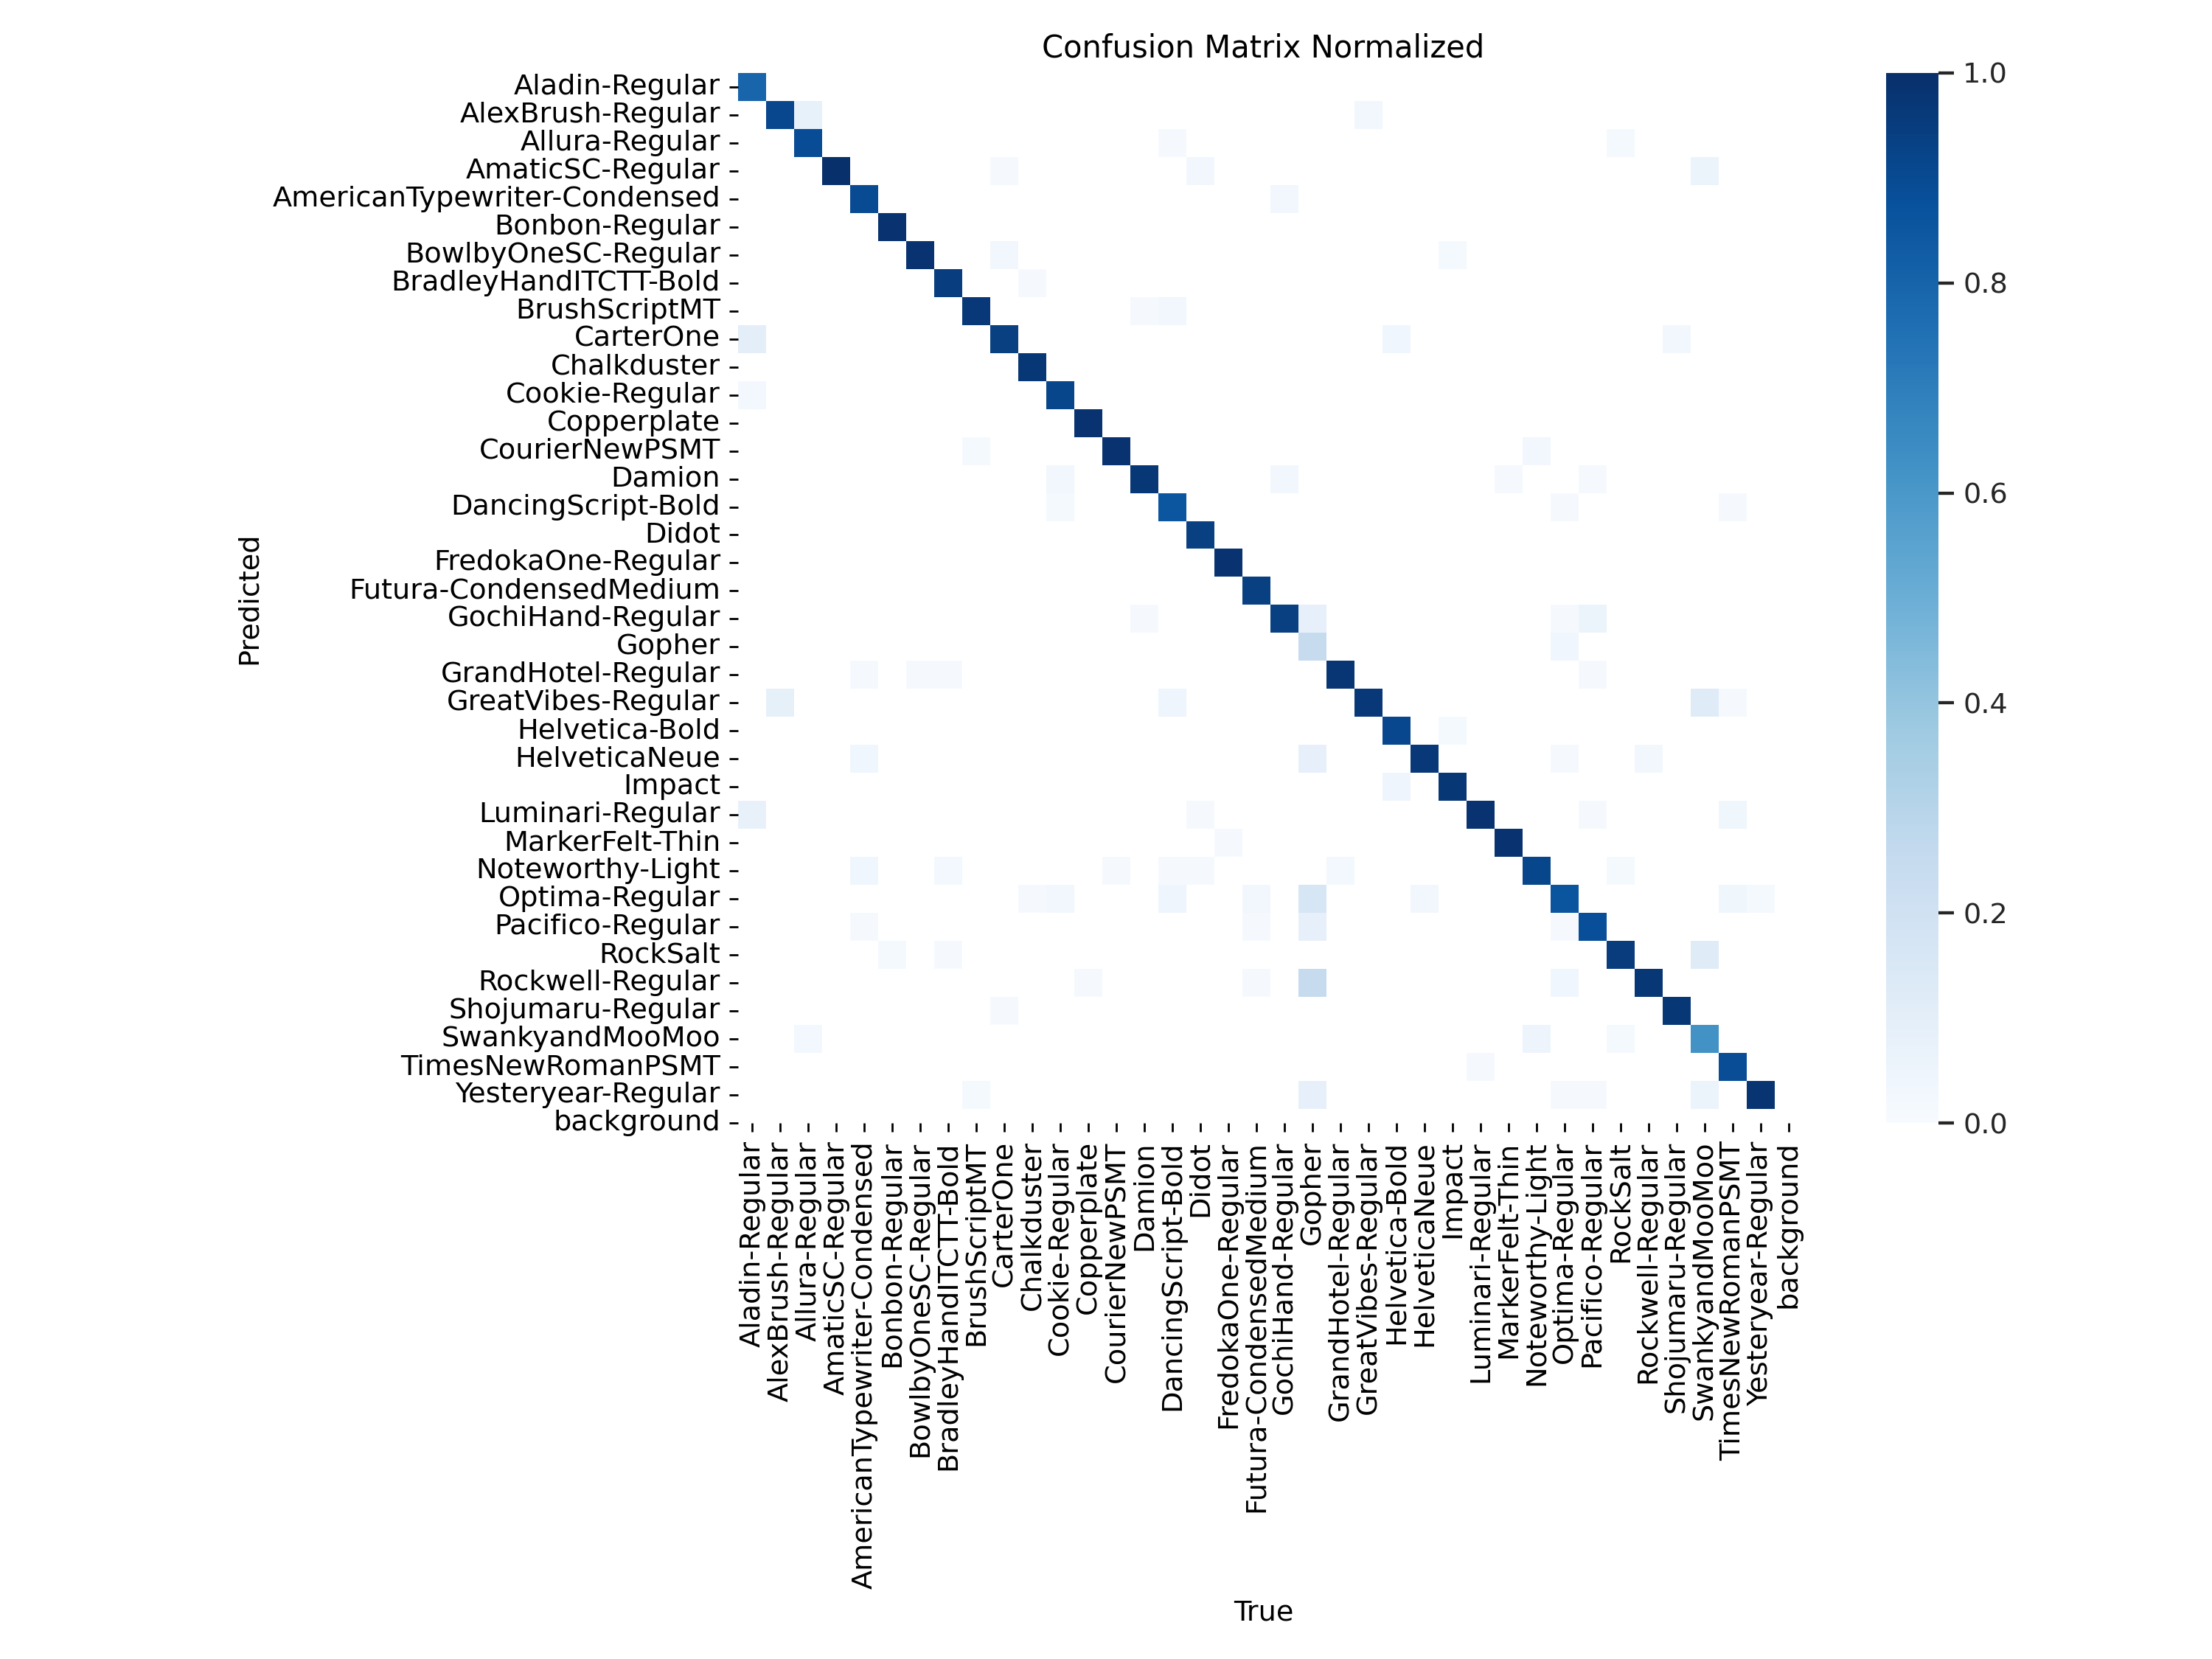

In [ ]:
Image.open('/content/runs/classify/train52/confusion_matrix_normalized.png')

##Prediction

In [ ]:
model = YOLO('/content/runs/classify/train5/weights/best.pt')  # load a custom model

# Predict with the model with any image from internet?
results = model('/content/drive/MyDrive/IAT 360/Computer Vision Project/test/BrushScriptMT/BrushscriptMT$$test_1.png', save=True)


image 1/1 /content/drive/MyDrive/IAT 360/Computer Vision Project/test/BrushScriptMT/BrushscriptMT$$test_1.png: 224x224 BrushScriptMT 0.44, Yesteryear-Regular 0.22, Chalkduster 0.10, Copperplate 0.08, Gopher 0.03, 16.6ms
Speed: 7.9ms preprocess, 16.6ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/predict4


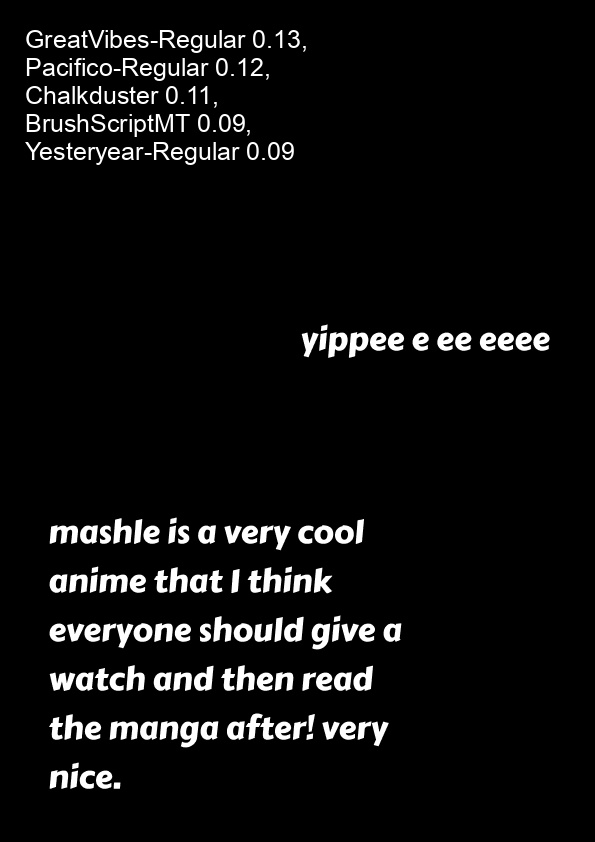

In [ ]:
# SHOW THE IMAGE STORED
%matplotlib inline
from PIL import Image

Image.open('/content/runs/classify/predict2/CarterOne$$test_1.jpg')

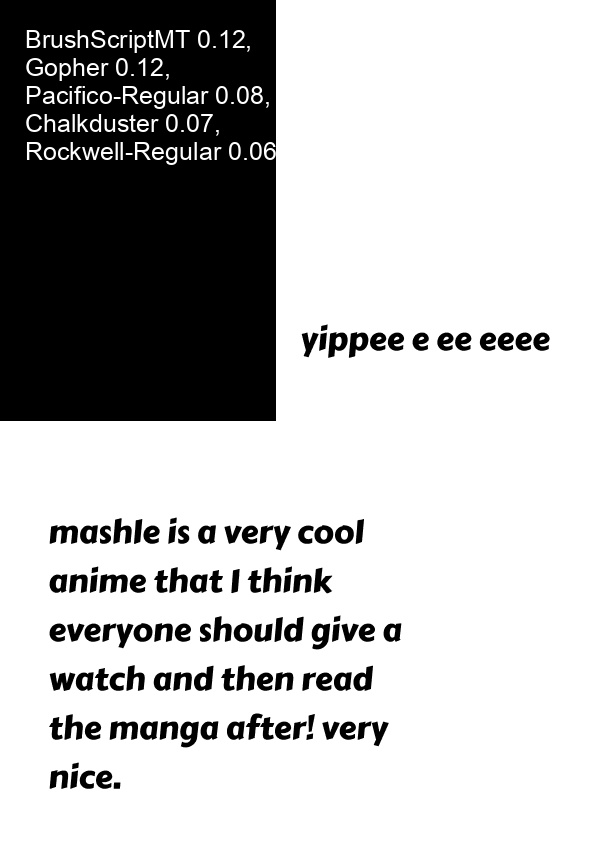

In [ ]:
Image.open('/content/runs/classify/predict3/CarterOne$$test_2.jpg')

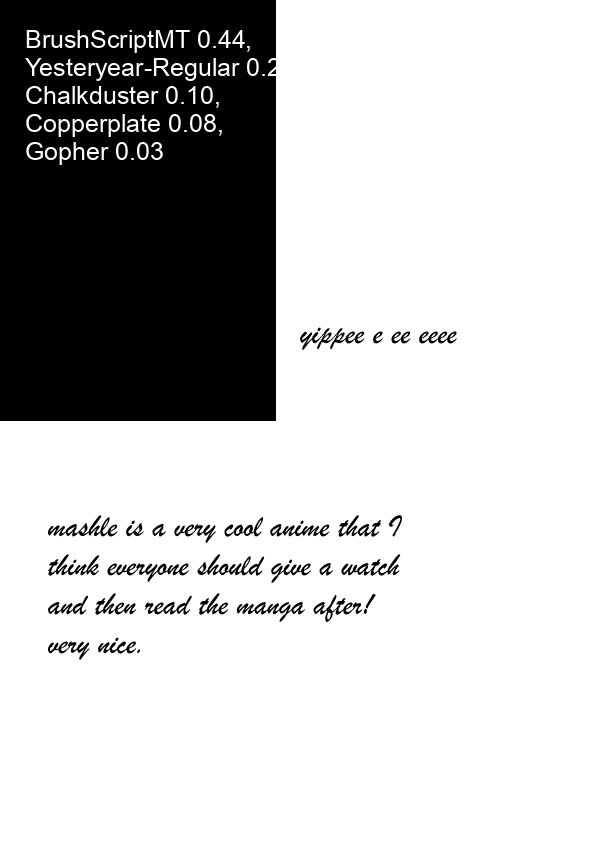

In [ ]:
Image.open('/content/runs/classify/predict4/BrushscriptMT$$test_1.jpg')